In [2]:
!pip install nltk==3.9.2 networkx==2.7.1


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import nltk

# Download the WordNet corpus
nltk.download("wordnet")

# Download the Open Multilingual Wordnet (often required for newer NLTK versions)
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\legion2025\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\legion2025\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import networkx as nx
from nltk.corpus import wordnet as wn


def graph_synsets(terms, pos=wn.NOUN, depth=2):
    """
    Создает из терминов terms граф networkx с глубиной depth.
    """
    G = nx.Graph(
        name="WordNet Synsets Graph for {}".format(", ".join(terms)),
        depth=depth,
    )

    def add_term_links(G, term, current_depth):
        for syn in wn.synsets(term):
            for name in syn.lemma_names():
                G.add_edge(term, name)
                if current_depth < depth:
                    add_term_links(G, name, current_depth + 1)

    for term in terms:
        add_term_links(G, term, 0)

    return G


G = graph_synsets(["trinket"])
print(nx.info(G))

Graph named 'WordNet Synsets Graph for trinket' with 25 nodes and 49 edges


C:\Users\legion2025\AppData\Local\Temp\ipykernel_37472\1942685047.py:28: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [3]:
print("Number of nodes", len(G.nodes))
print("Number of edges", len(G.edges))
print("Average degree", sum(dict(G.degree).values()) / len(G.nodes))

Number of nodes 25
Number of edges 49
Average degree 3.92


In [4]:
nx.diameter(G)

5

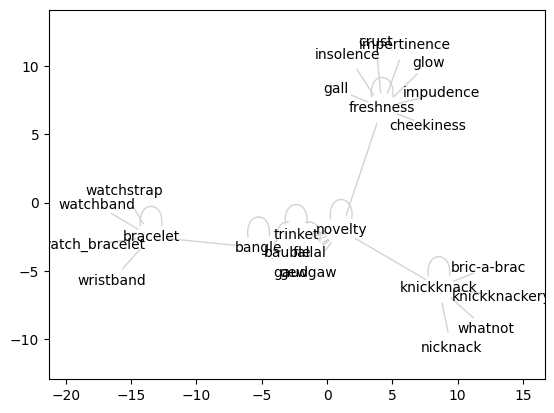

In [5]:
import matplotlib.pyplot as plt


def draw_text_graph(G):
    pos = nx.spring_layout(G, scale=18)
    nx.draw_networkx_nodes(G, pos, node_color="white", linewidths=0, node_size=500)
    nx.draw_networkx_labels(G, pos, font_size=10)
    nx.draw_networkx_edges(G, pos, edge_color="lightgrey")

    plt.tick_params(
        axis="both",  # изменяются обе оси, X и Y
        which="both",  # затрагиваются большие и малые деления
        bottom="off",  # скрыть деления вдоль нижнего края
        left="off",  # скрыть деления вдоль левого края
        labelbottom="off",  # скрыть подписи вдоль нижнего края
        labelleft="off",
    )  # скрыть подписи вдоль левого края

    plt.show()


draw_text_graph(G)

In [6]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Nodes found: ['trinket', 'bangle', 'bracelet', 'watchband', 'watchstrap', 'wristband', 'watch_bracelet', 'bauble', 'gaud', 'gewgaw', 'novelty', 'fallal', 'freshness', 'knickknack', 'glow', 'crust', 'gall', 'impertinence', 'impudence', 'insolence', 'cheekiness', 'bric-a-brac', 'nicknack', 'knickknackery', 'whatnot']


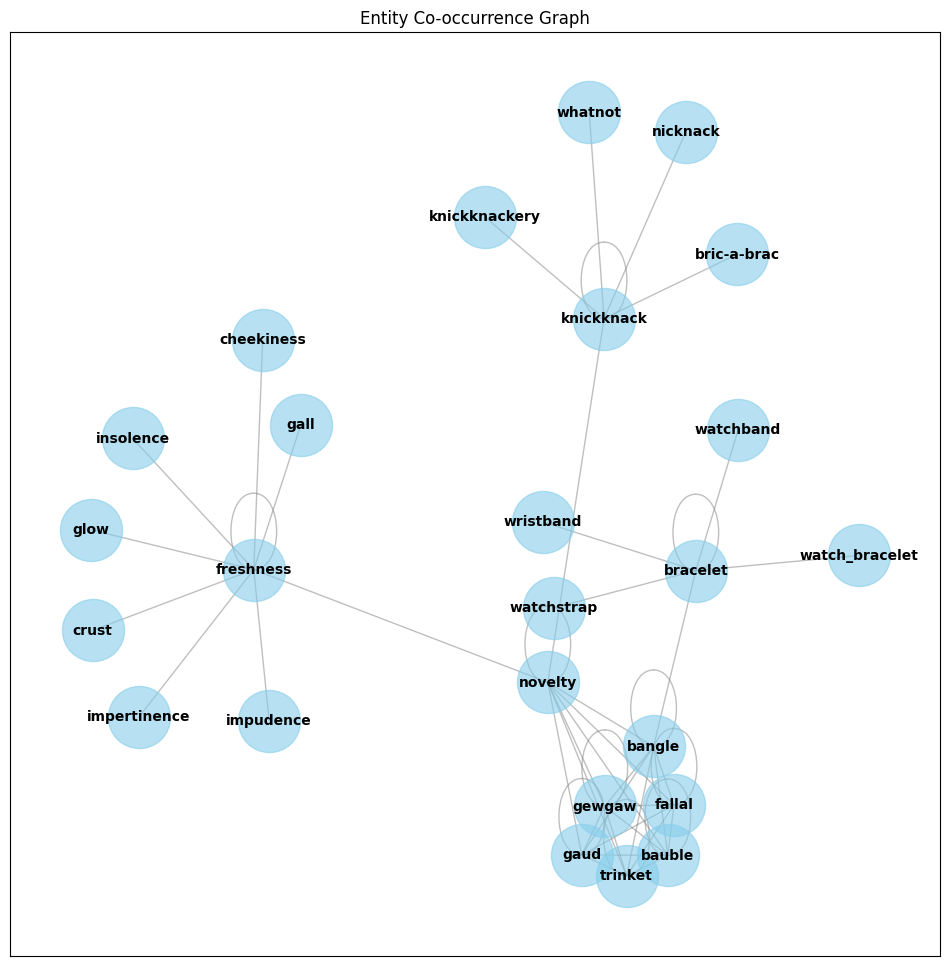

In [7]:
import matplotlib.pyplot as plt


def draw_text_graph(G):
    plt.figure(figsize=(12, 12))  # Make the figure larger

    # Calculate positions for the nodes
    pos = nx.spring_layout(G, k=0.5, scale=2)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=2000, alpha=0.6)

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color="grey", alpha=0.5)

    # Draw labels (the names of the entities)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

    # Hide the axes (Modern matplotlib version)
    plt.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )

    plt.title("Entity Co-occurrence Graph")
    plt.show()


# --- Run the visualization ---
print("Nodes found:", list(G.nodes()))
draw_text_graph(G)

### Анализ текста при помощи wordnet

In [ ]:
import nltk
\nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\legion2025\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\legion2025\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\legion2025\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\legion2025\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\legion2025\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\legion2025\AppData\Roaming\nltk_data...
[nltk_d

Анализ текста:

    The FDA approves a new gene therapy for patients with cancer. 
    The treatment reduces tumor growth and aids the immune system. 
    Doctors in the hospital celebrated the medical breakthrough.
    Health officials warn about the cost of the medicine and drugs.
    

Извлечено уникальных понятий (узлов): 17
Вычисление связей для 136 пар...
Построено ребер (семантических связей): 62
Удалено изолированных слов: 0

--- Анализ Центральности (Ключевые темы текста) ---
Топ-5 понятий по количеству связей (Degree):
  system: 0.8750
  growth: 0.8750
  doctors: 0.6875
  medicine: 0.6250
  cancer: 0.6250

Топ-5 самых влиятельных понятий (Eigenvector):
  growth: 0.3596
  system: 0.3585
  doctors: 0.3271
  medicine: 0.3191
  cancer: 0.3002


C:\Users\legion2025\AppData\Local\Temp\ipykernel_36656\2334194763.py:150: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(


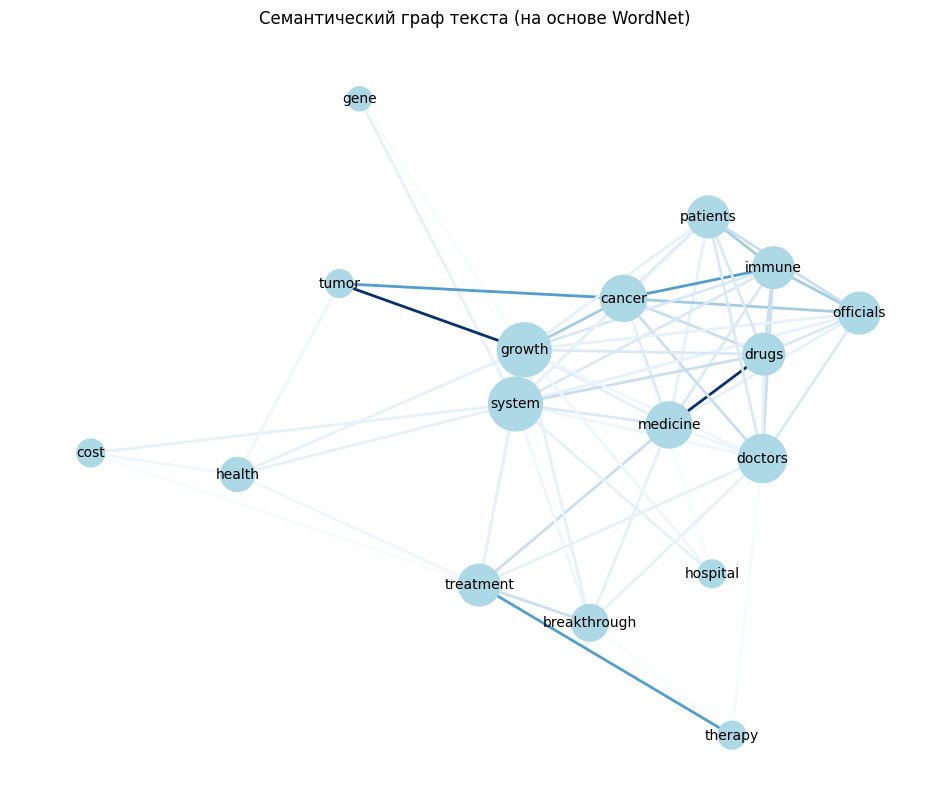

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
import itertools
import numpy as np

# Загрузка ресурсов (если не загружены)

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


class TextToWordNetGraph:
    def __init__(self, text):
        self.text = text
        self.G = nx.Graph()
        self.tokens = []

    def preprocess_and_extract_nouns(self):
        """
        Шаг 1. Подготовка текста.
        Извлекаем только существительные, так как WordNet лучше всего
        структурирует именно объекты и понятия.
        """
        # Токенизация
        words = word_tokenize(self.text.lower())
        # POS-теггинг (определение частей речи)
        tagged = nltk.pos_tag(words)

        # Оставляем только существительные (NN, NNS...) и исключаем короткие слова
        # Используем set для уникальности (граф понятий, а не последовательность)
        self.tokens = list(
            set(
                [word for word, pos in tagged if pos.startswith("NN") and len(word) > 2]
            )
        )

        print(f"Извлечено уникальных понятий (узлов): {len(self.tokens)}")
        return self.tokens

    def calculate_similarity(self, word1, word2):
        """
        Вычисляет семантическую близость между двумя словами через WordNet.
        Использует метрику path_similarity (длина пути в иерархии).
        """
        synsets1 = wn.synsets(word1, pos=wn.NOUN)
        synsets2 = wn.synsets(word2, pos=wn.NOUN)

        # Если слова нет в WordNet, пропускаем
        if not synsets1 or not synsets2:
            return 0

        # Берем максимальную близость между любыми значениями этих слов
        max_sim = 0
        for s1 in synsets1:
            for s2 in synsets2:
                sim = s1.path_similarity(s2)
                if sim is not None and sim > max_sim:
                    max_sim = sim

        return max_sim

    def build_graph(self, threshold=0.1):
        """
        Шаг 2. Построение графа.
        Узлы - слова из текста.
        Ребра - существуют, если смысловая близость WordNet выше порога.
        """
        # Добавляем узлы
        self.G.add_nodes_from(self.tokens)

        # Генерируем все возможные пары слов
        pairs = list(itertools.combinations(self.tokens, 2))

        print(f"Вычисление связей для {len(pairs)} пар...")

        count = 0
        for w1, w2 in pairs:
            weight = self.calculate_similarity(w1, w2)

            # Если связь достаточно сильная, добавляем ребро
            if weight > threshold:
                # Взвешиваем ребро силой связи
                self.G.add_edge(w1, w2, weight=weight)
                count += 1

        print(f"Построено ребер (семантических связей): {count}")

        # Удаляем изолированные узлы (слова, не связанные ни с чем в этом контексте)
        isolates = list(nx.isolates(self.G))
        self.G.remove_nodes_from(isolates)
        print(f"Удалено изолированных слов: {len(isolates)}")

    def analyze_centrality(self):
        """
        Шаг 3. Анализ (как в разделе 'Анализ структуры графа' главы 9).
        Находим ключевые темы текста.
        """
        if self.G.number_of_nodes() == 0:
            print("Граф пуст.")
            return

        print("\n--- Анализ Центральности (Ключевые темы текста) ---")

        # Degree Centrality - слова, связанные с наибольшим числом других слов в тексте
        degree_dict = nx.degree_centrality(self.G)
        sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

        print("Топ-5 понятий по количеству связей (Degree):")
        for word, score in sorted_degree[:5]:
            print(f"  {word}: {score:.4f}")

        # Eigenvector Centrality - слова, связанные с другими важными словами ("Google PageRank" подход)
        try:
            eigen_dict = nx.eigenvector_centrality(self.G, max_iter=500)
            sorted_eigen = sorted(eigen_dict.items(), key=lambda x: x[1], reverse=True)
            print("\nТоп-5 самых влиятельных понятий (Eigenvector):")
            for word, score in sorted_eigen[:5]:
                print(f"  {word}: {score:.4f}")
        except:
            print("Не удалось вычислить собственный вектор (возможно, граф несвязный).")

    def visualize(self):
        """
        Визуализация с учетом весов ребер.
        """
        if self.G.number_of_nodes() == 0:
            return

        plt.figure(figsize=(12, 10))
        pos = nx.spring_layout(self.G, k=0.5, iterations=50)

        # Размеры узлов зависят от степени (важности)
        d = dict(self.G.degree)
        node_sizes = [v * 100 + 100 for v in d.values()]

        # Цвета ребер зависят от силы связи
        edges, weights = zip(*nx.get_edge_attributes(self.G, "weight").items())

        nx.draw_networkx_nodes(
            self.G, pos, node_size=node_sizes, node_color="lightblue"
        )
        nx.draw_networkx_labels(self.G, pos, font_size=10)
        nx.draw_networkx_edges(
            self.G,
            pos,
            edgelist=edges,
            edge_color=weights,
            edge_cmap=plt.cm.Blues,
            width=2,
        )

        plt.title("Семантический граф текста (на основе WordNet)")
        plt.axis("off")
        plt.show()


if __name__ == "__main__":
    # Пример текста (новостной отрывок, похожий на тематику главы)
    sample_text = """
    The FDA approves a new gene therapy for patients with cancer. 
    The treatment reduces tumor growth and aids the immune system. 
    Doctors in the hospital celebrated the medical breakthrough.
    Health officials warn about the cost of the medicine and drugs.
    """

    print(f"Анализ текста:\n{sample_text}\n")

    # 1. Инициализация
    analyzer = TextToWordNetGraph(sample_text)

    # 2. Извлечение сущностей (существительных)
    analyzer.preprocess_and_extract_nouns()

    # 3. Построение графа (Порог 0.1 отсекает очень слабые связи)
    analyzer.build_graph(threshold=0.1)

    # 4. Анализ
    analyzer.analyze_centrality()

    # 5. Визуализация
    analyzer.visualize()

In [2]:
!pip install numpy==1.26.4


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
